# Ядерные методы машинного обучения и непараметрической статистики

Сегодняшняя лекция посвящена важному, интересному и очень глубокому понятию ядерных функций и их применению в машинном обучении. Ядерные функции и методы работы с ними имеют глубокую теоретическую основу, уходящую корнями в функциональный анализ и теорию воспроизводящих гильбертовых пространств. В этой лекции мы воспользуемся результатами этой области знаний, для того чтобы разработать способы перехода от линейных задач машинного обучения к нелинейным "малой кровью", то есть практически не меняя подходы, которые мы обсуждали на предыдущих лекциях. Мы познакомимся с понятием **ядра** и его применением к задачам машинного обучения и непараметрической статистики.

## Задача машинного обучения: напоминание

Пусть $f(\vec x, Θ)$ - это модель машинного обучения, принимающая на вход векторное описание объекта $\vec x$ и некоторое  множество параметров $Θ$, определяющих сообой конкретную обученную модель.

**Сведение задачи машинного обучения к задаче оптимизации**:
Зададимся некоторой функцией потерь $L(y, f(\vec x, Θ))$

Тогда задача обучения сводится к задаче поиска оптимальных параметров $Θ$ для минимизации математического ожидания $L$:
$$\textbf{E}[L(\vec x, Θ)] → \min_{Θ}$$

Для задач классификации на практике в качестве функции потерь обычно рассматривается перекрёстная энтропия:
$$H(p, q) = -\sum_{x} p(x) \log q(x) $$
Которая в случае задачи бинарной классификации записывается следующим образом:
$$\text{BCE} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right] $$



## Линейная задача классификации

Выборки, которые в исходном пространстве признаковых описаний могут быть идеально классифицированы линейной разделяющей поверхностью, называются **линейно разделимыми**. Это означает, что существует такая прямая линия (в двумерном пространстве), плоскость (в трехмерном пространстве) или гиперплоскость (в более высоких измерениях), которая может разделить точки данных разных классов без перекрытия. Линейная разделимость является ключевым предположением для многих алгоритмов машинного обучения, включая перцептрон, SVM и логистическую регрессию. В контексте этих алгоритмов, если выборка является линейно разделимой, это значительно упрощает процесс обучения модели и повышает ее эффективность. Однако на практике данные часто не являются строго линейно разделимыми.

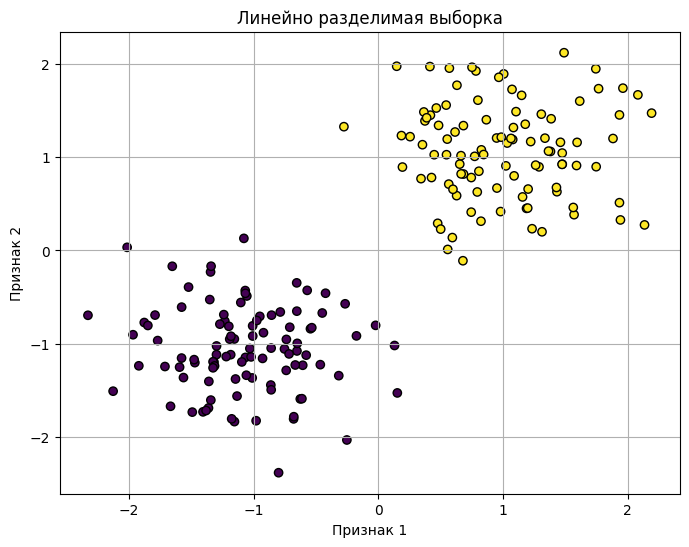

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация первой группы точек
np.random.seed(0)  # Для воспроизводимости результатов
n_points = 100
X1 = np.random.normal(size=(n_points, 2)) * 0.5 + np.array([1, 1])
Y1 = np.ones(n_points)

# Генерация второй группы точек
X2 = np.random.normal(size=(n_points, 2)) * 0.5 + np.array([-1, -1])
Y2 = np.zeros(n_points)

# Объединение данных
X = np.vstack((X1, X2))
Y = np.hstack((Y1, Y2))

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Линейно разделимая выборка')
plt.grid(True)
plt.show()


В случае линейной разделимости выборки модель машинного обучения, способная обеспечить идеальное качество классификации, выглядит очень просто:
$$f(\vec x, Θ) = Θ_0 + Θ_1^T\vec x$$

В случае правильно подобранных параметров $Θ$, такая модель способна идеально классифицировать выборку. Такая задача классификации называется **линейной**.

Конечно, такие функции не обеспечивают идеальную или даже удовлетворительную классификацию любого набора данных, даже при условии существования *некоторой* регулярности, разделяющей два класса. Например, мы можем поставить перед собой задачу классификации радиального набора данных:


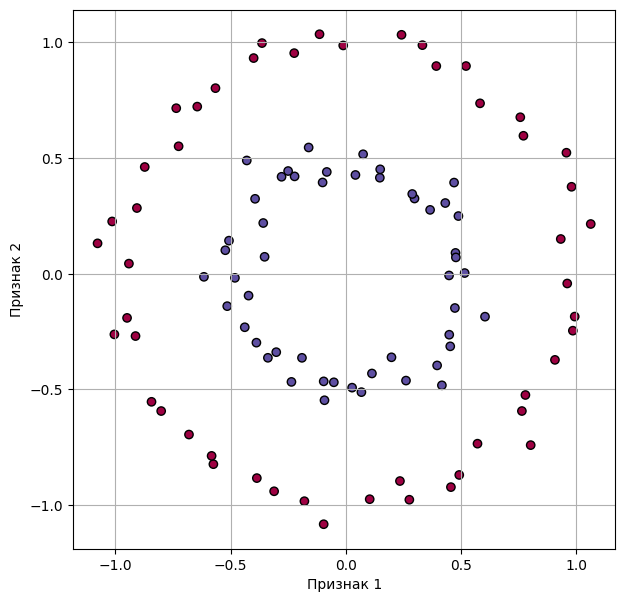

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Генерация выборки данных
np.random.seed(0)
X, y = datasets.make_circles(noise=0.05, factor=0.5, random_state=42)

# Визуализация результата
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True)
plt.show()

Какое решение для этой проблемы можно придумать?

Кажется, самое простое и очевидное - изменить модель. Давайте вместо линейной модели $f(\vec x, Θ) = Θ_0 + Θ_1^T\vec x$ выберем другое семейство:
$$f_r(x_1, x_2, Θ) = \theta_1x_1^2 + \theta_2x_2^2 + Θ_0$$

Например, при $Θ_1 = Θ_2 = 1$ и $Θ_0 = -0.75^2$, уравнение $$f_{r}(x_1, x_2, Θ) = 0$$ задает окружность радиуса $0.75$ в пространстве признаков $x_1$ и $x_2$:

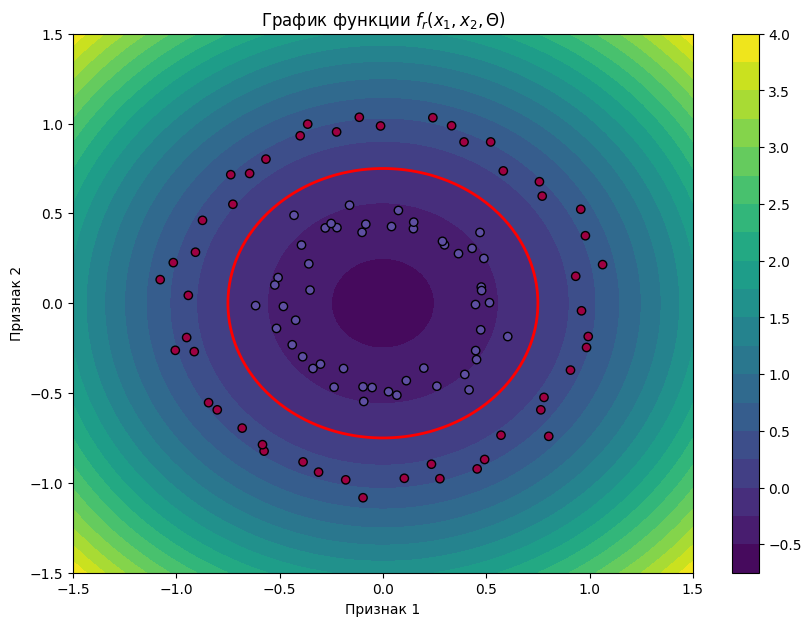

In [3]:
Theta_1 = Theta_2 = 1
Theta_0 = -0.75**2

# Создание сетки значений для x1 и x2
x1 = np.linspace(-1.5, 1.5, 100)
x2 = np.linspace(-1.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Вычисление значений функции f_r
Z = Theta_1 * X1**2 + Theta_2 * X2**2 + Theta_0

# Визуализация результата
plt.figure(figsize=(10, 7))
contour = plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('График функции $f_r(x_1, x_2, \\Theta)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.contour(X1, X2, Z, levels=[0], colors='r', linewidths=2)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

У такого подхода есть два довольно важных недостатка:

1. В рамках такого подхода придется каждый раз "изобретать" новое семейство решающих функций, а затем оптимизировать его параметры. Это ручная работа, которую было бы неплохо оптимизировать или хотя бы превратить в переборную

2. В примере выше мы имеем дело с нелинейной задачей. Это сложно, как с технической точки зрения, так и с точки зрения аналитического анализа рассматриваемых моделей. Всегда предпочтительно работать с линейными моделями

**Вывод:** нужно переформулировать подход в универсальной терминологии, которая позволит а) взглянуть на задачу, как на линейную и б) поможет систематизировать возможные разумные семейства функций, которые мы можем использовать для решения подавляющего большинства задач

## Изменение пространства признаков

Другой взгляд на преобразование семейства функций, которое мы осуществили выше, состоит в следующем. Обратим внимание, что функция $f_r(x_1, x_2, Θ) = \theta_1x_1^2 + \theta_2x_2^2 + Θ_0$ **линейна относительно аргументов $x_1^2$ и $x_2^2$**. То есть мы можем воспринимать этот переход не как переход от одного семейства решающих функций к другому, а как использование той же самой линейной модели, но примененной уже к другому **преобразованному** пространству признаков. В этом новом прространстве мы получим уже совершенно другое облако точек:

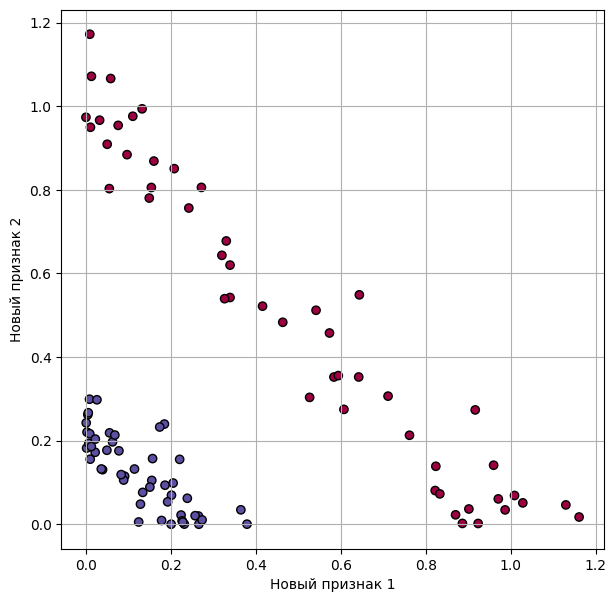

In [4]:
np.random.seed(0)
X, y = datasets.make_circles(noise=0.05, factor=0.5, random_state=42)

# Визуализация результата
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0]**2, X[:, 1]**2, c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.xlabel('Новый признак 1')
plt.ylabel('Новый признак 2')
plt.grid(True)
plt.show()

В этом пространстве облако, соответствующие классу "1", очень просто отделяются от облака, соответствующего классу "0" при помощи линейной функции.

Можем мы здесь воспользоваться и другими возможными преобразованиями признаков. Например, подойдет переход к признакам

$$ \phi_1(\vec x) = x_1^2 + x_2^2$$
$$ \phi_2(\vec x) = x_1^2 - x_2^2$$

Вообще новые признаки мы будем обозначать буквой $ϕ$. Этих признаков может быть вообще говоря может быть сколько угодно, поэтому мы будем записывать их в виде вектор-функции векторного же аргумента:
$$\vec ϕ(\vec x) = [ϕ_1(\vec x), ϕ_2(\vec x) ... ]$$

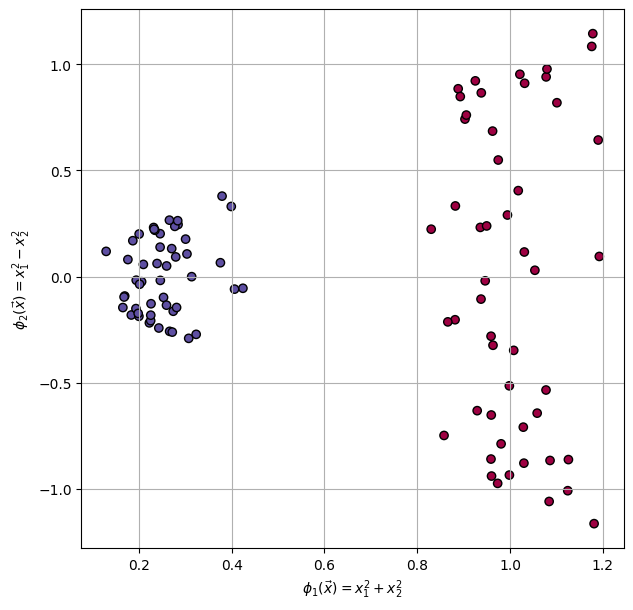

In [5]:
np.random.seed(0)
X, y = datasets.make_circles(noise=0.05, factor=0.5, random_state=42)

# Визуализация результата
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0]**2 + X[:, 1]**2, X[:, 0]**2 - X[:, 1]**2, c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.xlabel(r'$\phi_1(\vec x) = x_1^2 + x_2^2$')
plt.ylabel(r'$\phi_2(\vec x) = x_1^2 - x_2^2$')
plt.grid(True)
plt.show()

## Kernel Trick

Мы выяснили, что переход от одного признакового пространства к другому посредством применения к исходному вектору признаков $\vec x$ некоторой векторной функции $\vec ϕ(\vec x) = [\phi_1(\vec{x}), \phi_2(\vec{x}) ... ]$ позволяет нам перейти от нелинейной задачи классификации к линейной при правильном выборе этой функции $\vec \phi$. Возникает вопрос - как правильно подбирать эту функцию $\vec \phi$ и можно ли хотя бы частично автоматизировать этот процесс?

Чтобы ответить на этот вопрос, обратимся к некоторым следствиям области математики, которая называется **функциональный анализ**. Мы не будем подробно описывать условия и следствия, которые формулируются в теории воспроизводящих гильбертовых пространств, в связи со сложностью этой области для неподготовленного слушателя. Вместо этого нестрого сформулируем следующее  утверждение:

Пусть у нас есть некоторая функция $\vec \phi$, производящая интересующее нас преобразование исходного признакового пространства. Тогда существует такая функция $K: X × X → R$, что $$K(\vec x, \vec x') = ⟨\vec ϕ(\vec x), \vec ϕ(\vec x')⟩$$

Где под операцией $⟨\vec a, \vec b⟩$ подразумевается скалярное произведение.

То есть **каждому преобразованию признакового пространства $ϕ$ соответствует некоторая функция K, которая задает скалярное произведение в преобразованном пространстве как функцию от элементов исходного пространтсва**. Это утверждение позволяет нам сделать следующий шаг и взглянуть на переход от нелинейной модели к линейной не просто за счет преобразований, примененных к признакам, а как на **изменения функции, задающей скалярное произведение**. Условно говоря, переопределив скалярное произведение специальным образом, мы получим интересующее нас изменение модели $f$. Тут нужно отметить, что это относится, конечно, к тем моделям, которые в принципе основаны на вычислении скалярного произведения между объектами исходного пространства. Хорошим примером такой модели служит $SVM$.

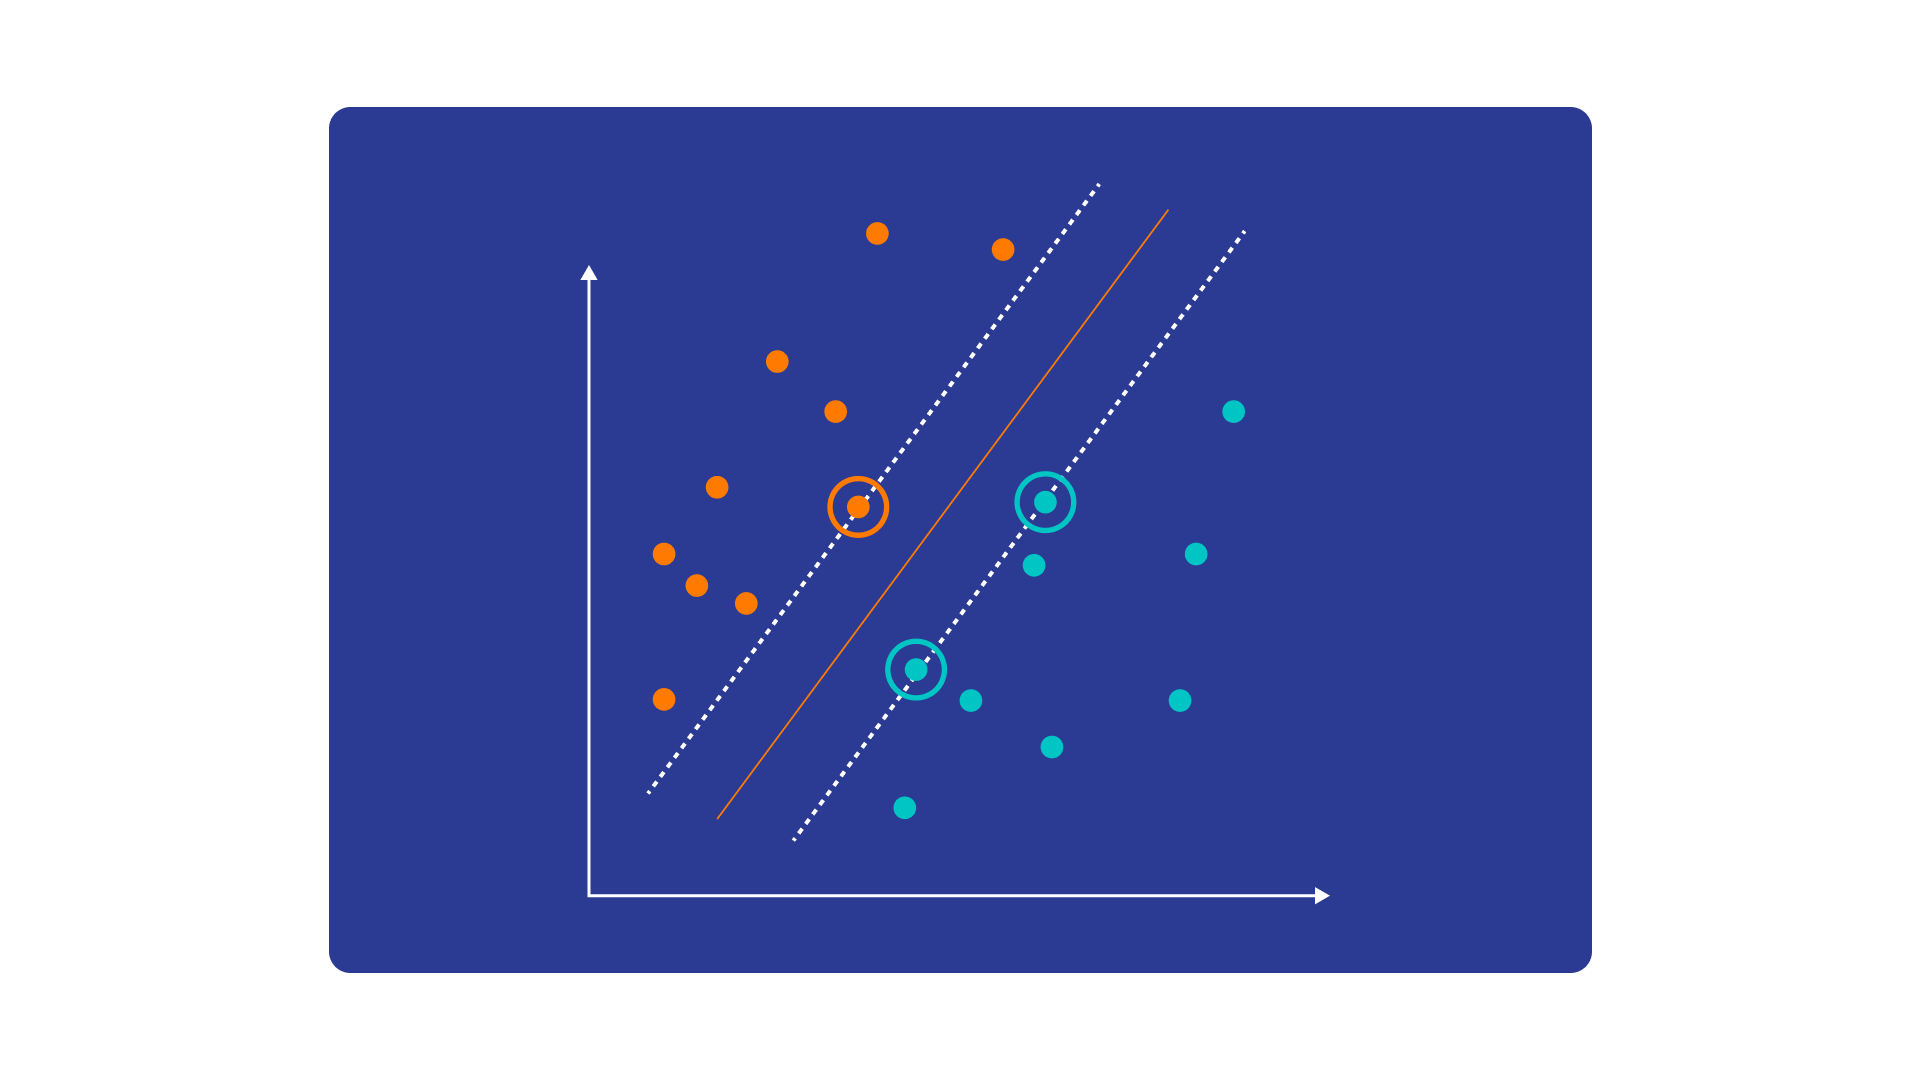

Напомню основную концепцию метода опорных векторов: мы строим раззделяющую гиперплоскость, отвечающую **критерию максимизации ширины полосы**, отделяющей один класс от другого. При этом возникает задача оптимизации, решаемая методоми квадратичного программирования. Перейдем сразу к рассмотрению решения этой проблемы.

В результате решения задачи квадратического программирования мы имеем набор коэффициентов $λ_i$ и решающее правило:

$$a(x) = sign(∑\lambda_iy_i\langle \vec x_i, \vec x \rangle - ∑λ_iy_i \langle \vec x_i, \vec x_j ⟩ - y_i)$$

Тут: $\vec x$ - объект, класс которого мы определяем, $\vec x_i$ - объект обучающей выборки с индексом $i$, $y_i$ - метка объекта обучающей выборки с индексом $i$ (+1 или -1).

Заменим в этой формуле скалярное произведение на вычисление некоторой функции $K(\vec x, \vec x')$ и получим:

$$a(x) = sign(∑\lambda_iy_iK( \vec x_i, \vec x ) - ∑λ_iy_i K( \vec x_i, \vec x_j ) - y_i)$$

Где конкретный вид $K$ зависит от того, какое преобразование признаков мы хотим выполнить. В исходном пространстве построенная разделяющая функция уже будет **нелинейной**, хотя вид выражения остался прежним.

Такой переход к формуле с функцией $K$ обычно называют **Kernel Trick**, а саму функцию $K$ - **ядром** (**kernel**).

## RBF-ядро

Для решения задачи с двумя круговыми классами мы также можем воспользоваться **Kernel Trick**. Для этого мы воспользуемся очень известным типом ядра, который называется **RBF**(Radial Basis Function). RBF зависит только от расстояния между двумя аргументами

$$ K(x, y) = \exp\left(-\frac{|x-y|^2}{2\sigma^2}\right) $$

где:

* $(K(x, y))$ — значение ядра на паре аргументов $(x)$ и $(y)$,
* $(|\cdot|)$ обозначает евклидову норму ,
* $(\sigma)$ — параметр масштаба, который влияет на ширину ядра.

Как и обычное скалярное произведение, RBF оценивает меру близости между своими аргументами, Но в некотором "искаженном" пространстве. Например, если мы зафиксируем один из аргументов, то график этой близости в зависимости от второго аргумента будет выглядеть не линейно, а как гауссиана:

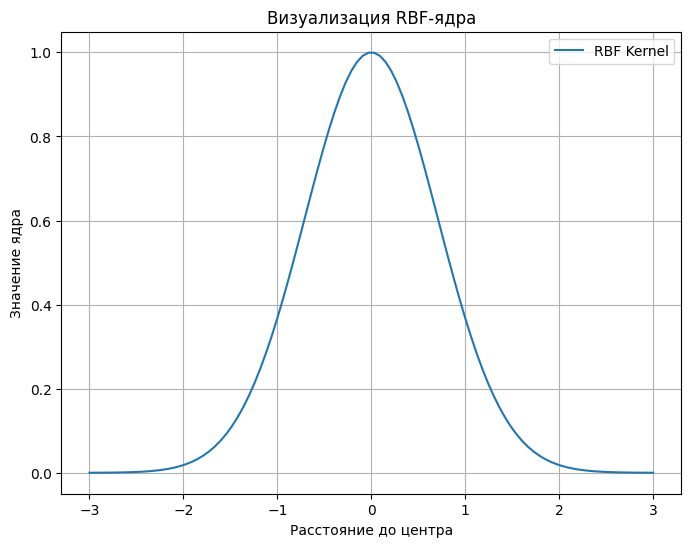

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Определение параметров RBF-ядра
center = 0
gamma = 1

# Генерация данных для визуализации
x = np.linspace(-3, 3, 100)
rbf_values = np.exp(-gamma * (x - center)**2)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x, rbf_values, label='RBF Kernel')
plt.title('Визуализация RBF-ядра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Значение ядра')
plt.legend()
plt.grid(True)
plt.show()


В этом примере ядро рассматривалось как функция от пары скалярных аргументов. Этот случай сам по себе очень важный, потому что часто именно в таком виде ядра используются в математической статистике (но об этом мы поговорим ниже). Но применить ядро можно, конечно, и в случае, когда аргументы - векторы.

В фреймворке `sklearn` есть возможность использовать нелинейные ядра напрямую с `SVM`. Для этого достаточно указать тип ядра, которое мы хотим использовать, напрямую при определении класса `SVC`, как это делается в примере ниже.

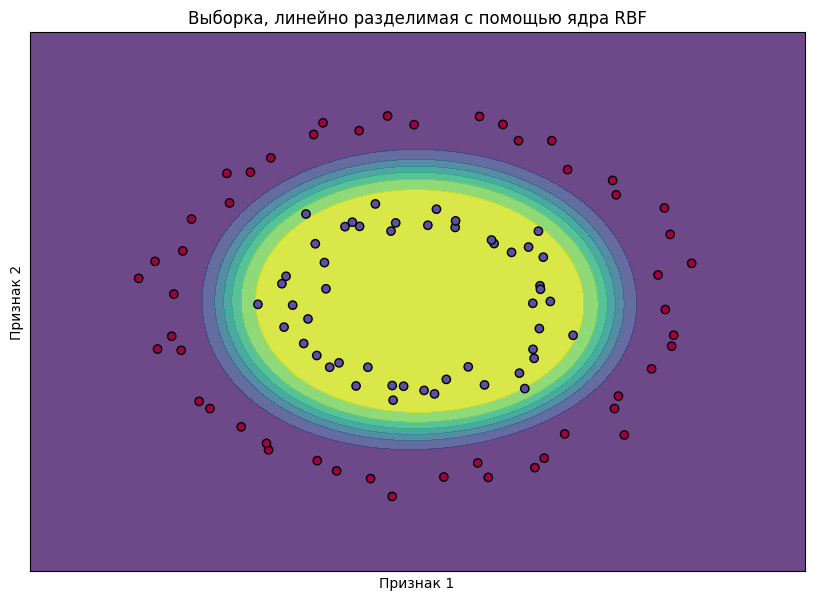

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Генерация выборки данных
np.random.seed(0)
X, y = datasets.make_circles(noise=0.05, factor=0.5, random_state=42)

# Обучение SVM с RBF-ядром
clf = SVC(kernel='rbf', C=1, probability=True).fit(X, y)

# Создание сетки для визуализации
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500),
                     np.linspace(-1.5, 1.5, 500))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

# Визуализация результата
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
plt.title('Выборка, линейно разделимая с помощью ядра RBF')
plt.grid()
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


## Другие примеры ядер

Помимо **RBF** существует множество других типов ядерных функций. Рассмотрим некоторые из них:

### Линейное ядро

Использование линейного ядра возможно в предположении, что данные заранее имеют линейные зависимости. Линейное ядро представляет из себя стандартное скалярное произведение и является "дефолтным" выбором при тестировании алгоритма.

$$K(\vec x, \vec y) = \gamma \vec x^T \vec y $$

/home/varvara/miniconda3/envs/data_analysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 119909 (\N{MATHEMATICAL ITALIC SMALL X}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/varvara/miniconda3/envs/data_analysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 119910 (\N{MATHEMATICAL ITALIC SMALL Y}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


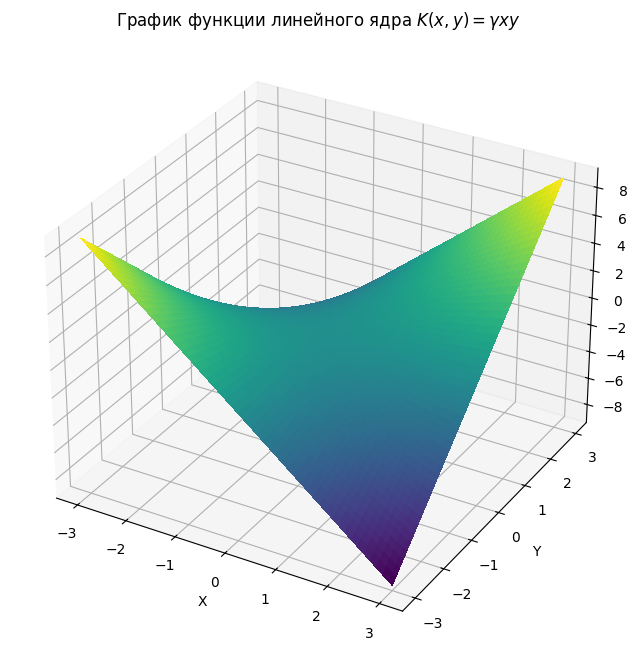

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры
gamma = 1

# Генерация данных
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = gamma * X * Y  # Вычисление значений функции линейного ядра

# Создание трехмерного графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация поверхности
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)

# Настройка осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('K(𝑥, 𝑦)')
ax.set_title(r'График функции линейного ядра $K(x, y) = γxy$')

plt.show()


### Полиномиальное ядро

Полиномиальное ядро - логичное обобщение линейного ядра. Мы предполагаем, что зависимости, которые мы ищем в данных, имеют полиномиальный характер, то есть зависят не только от первой степени аргументов, но и от высших степеней. Полинномиальное ядро задается следующей формулой:

$$K(\vec x, \vec y) = (γ \vec x^T \vec y + c)^d $$

Где $d$ - степень многочлена, задающего ядро.

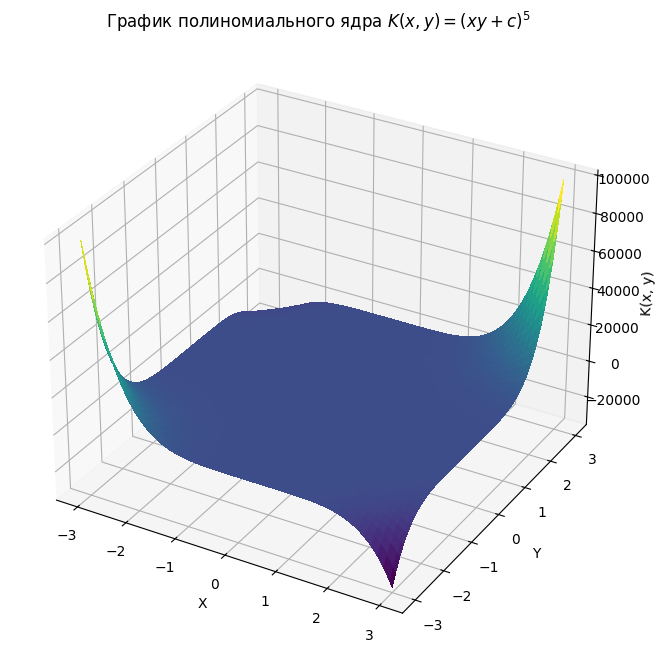

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры
c = 1
d = 5

# Генерация данных
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = (X * Y + c)**d  # Вычисление значений полиномиального ядра

# Создание трехмерного графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация поверхности
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)

# Настройка осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('K(x, y)')
ax.set_title(fr'График полиномиального ядра $K(x, y) = (xy + c)^{d}$')

plt.show()


### Сигмоидальное ядро

Также одно из популярных ядер, задаваемое двумя параметрами. Оно вычисляется по следующей формуле:

$$K(\vec x, \vec y) = tanh(γ\vec x^T \vec y + c)$$

Несмотря на свой специфический вид, сигмоидальное ядро довольно часто используется на практике.

Здесь $tanh(x)$ - это функция **гиперболического тангенса**, которая задается следующим образом:

$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

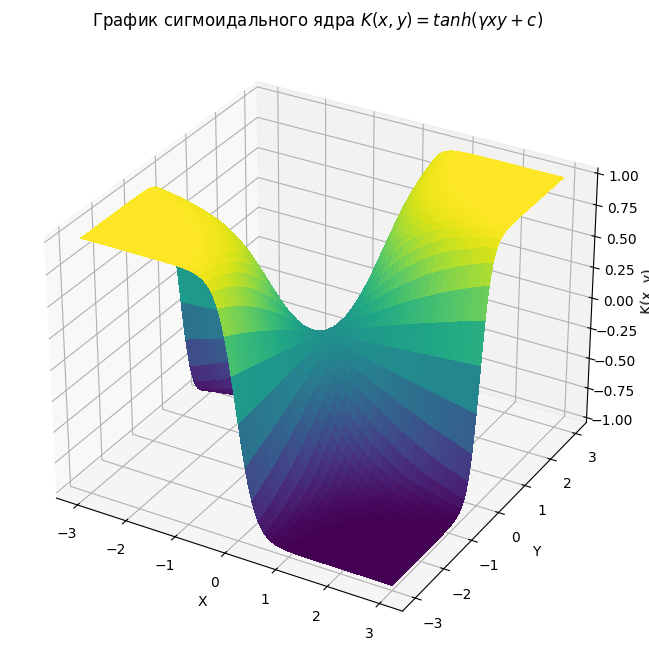

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры
gamma = 1
c = 0

# Генерация данных
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.tanh(gamma * X * Y + c)  # Вычисление значений сигмоидального ядра

# Создание трехмерного графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация поверхности
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)

# Настройка осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('K(x, y)')
ax.set_title('График сигмоидального ядра $K(x, y) = tanh(γxy + c)$')

plt.show()


### Пример использования различных ядер

В этом примере мы посмотрим на влияние применения различных ядер для решения задачи классификации. Мы рассмотрим линейное, полиномиальное со степенями 2 и 3, RBF, а также сигмоидальное ядра. Код, представленный ниже, является модификацией кода Gaël Varoquaux и Andreas Müller, размещенного на [официальной странице](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) sklearn, посвященной сравнению различных классификаторов.

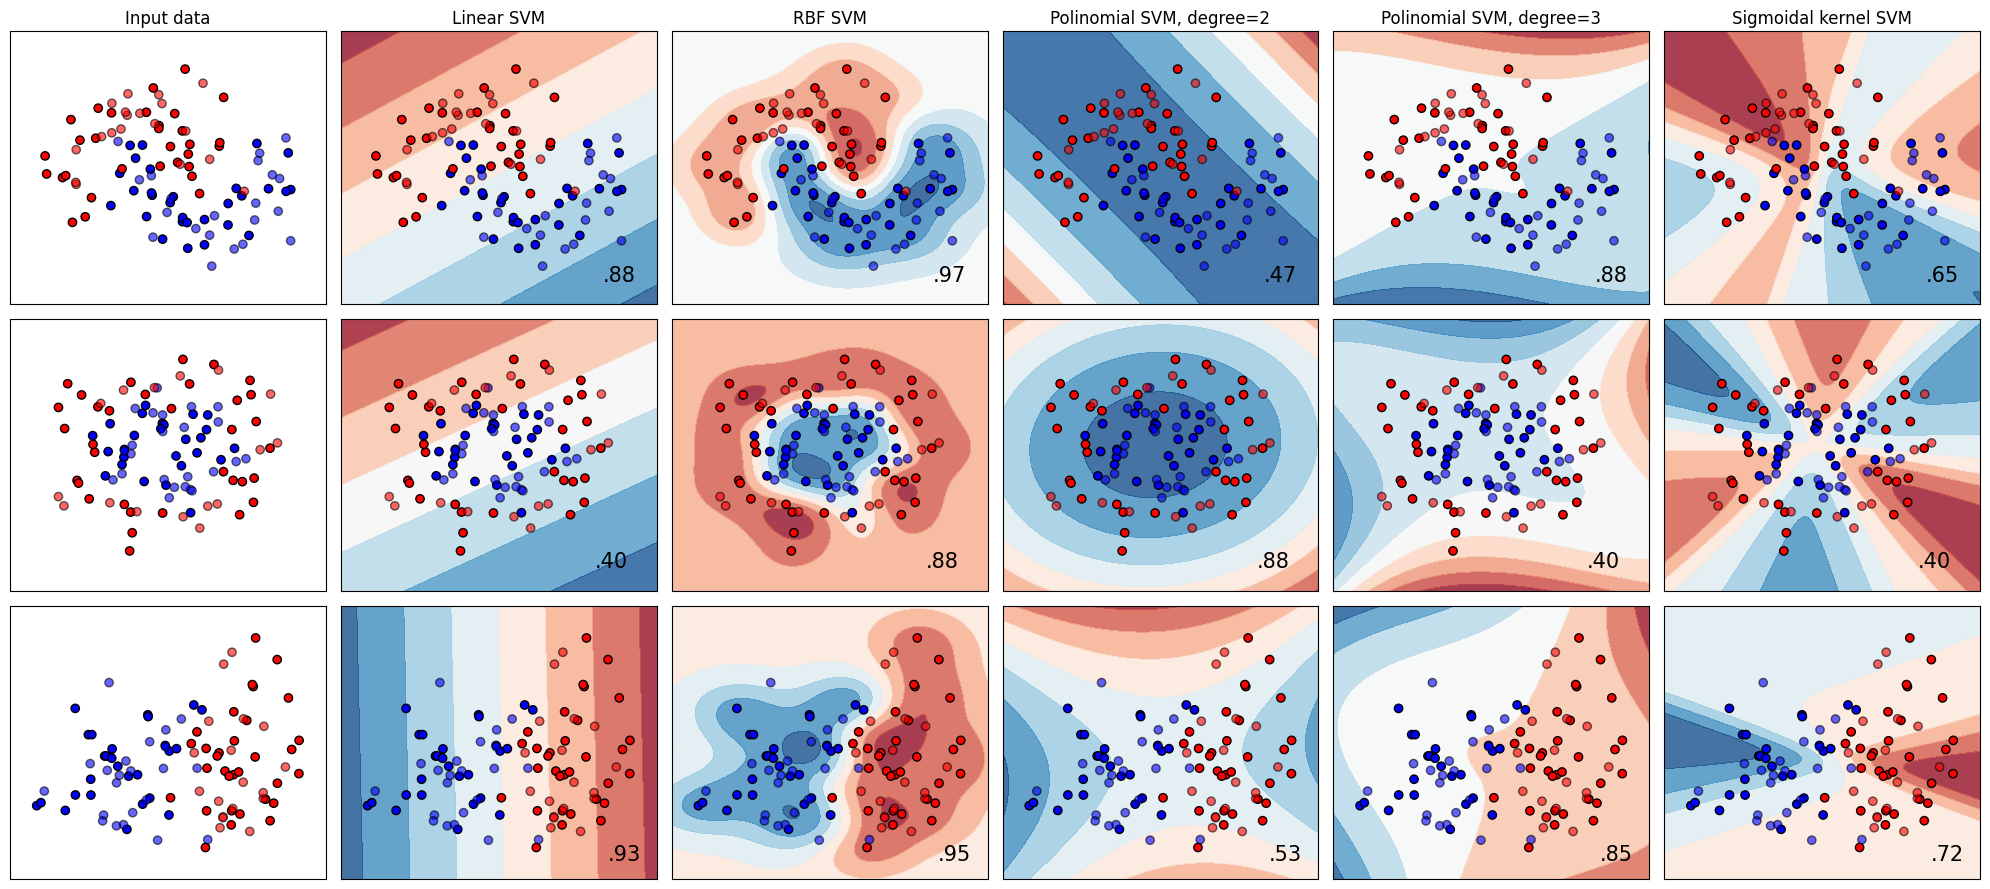

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

names = [
    "Linear SVM",
    "RBF SVM",
    "Polinomial SVM, degree=2",
    "Polinomial SVM, degree=3",
    "Sigmoidal kernel SVM"
]

classifiers = [
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    SVC(C=1.0, kernel='poly', degree=2, gamma=2),
    SVC(C=1.0, kernel='poly', degree=3, gamma=2),
    SVC(C=1.0, kernel='sigmoid', degree=3, gamma=2)
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(20, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVR

SVR(())

## Ядра в статистике

Многие ядра задаются функцией от разности аргументов, то есть являются в этом смысле функцией одного аргумента:
$$K(\vec x, \vec x') = K(||\vec x - \vec x'||)$$

Если смотреть на ядро, как на функцию одного аргумента, для функции ядра можно дать следующее более практичное, но несколько отличающееся определение:

**Ядро - неотрицательная вещественнозначная нормированная симметричная функция**.

Таким определением пользуются в математической статистике. Очень часто на ядра в этом смысле накладывается еще одно условие:
$$\int_{-∞}^{+∞}{K(u)du} = 1$$

Одно из основных применений ядерных функций в статистике - **непараметрическая оценка плотности распределения**.


### Kernel Density Estimation (KDE)

Оценка параметров распределения - это большая задача математической статистики. Она заключается в том, чтобы **по набору наблюдений** (сэмплов) определить, **из какого распределения этот набор получился**. Методы решения этой задачи глобально делятся на 2 типа: параметрические и непараметрические. Параметрические методы - это методы, основанные на гипотезе о том, что мы примерно представляем, к какому семейству распределений относится искомое, и достаточно оценить его неизвестные параметры. Параметрическая статистика занимается в основном такими оценками.

Однако совершенно не всегда такие предположения можно сделать. Иногда требуется хотя бы примерно оценить функцию плостности распределения без привлечения дополнительных предположений и гипотез. В таком случае на помощь приходит **непараметрические** методы. Одним из таких методов является **ядерная оценка плотности** (Kernel Density Estimation).



Формула ядерного оценщика плотности распределения следующая:

$$ \hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{|x - X_i|}{h}\right)$$

Функция $\hat{f}_h(x)$ - это оценка плотности распределения, из которого был сэмплирован набор наблюдений $X_1 ... X_N$. Эта плотность в каждой конкретной точке $x$ зависит от всех наблюдений, взятых с некоторым весом, который вычисляется при помощи соответствующего ядра.
Здесь $h$ - это дополнительный параметр, представляющий из себя *ширину полосы сглаживания*. На расстоянии, превышающим $h$ от $x$, влияние наблюдений $X_i$ очень мало или равно $0$ (в зависимости от типа ядра).

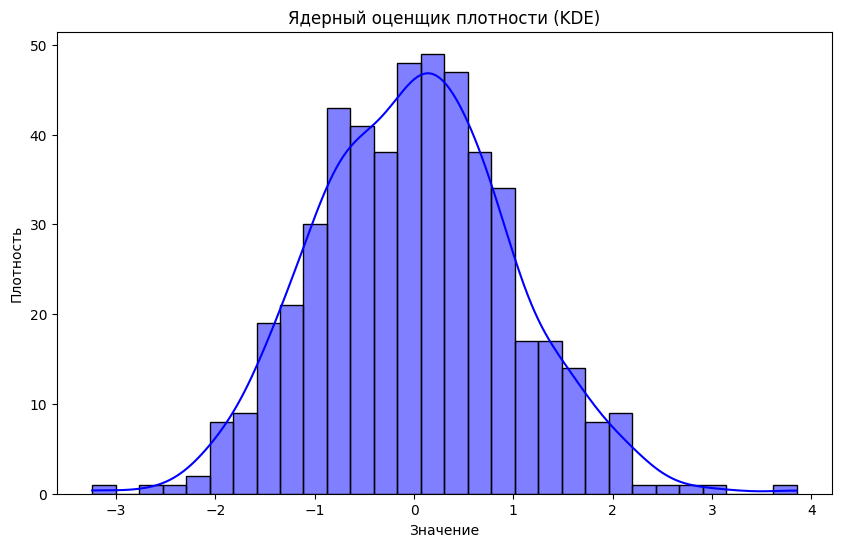

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация выборки из нормального распределения
np.random.seed(42)  # Для воспроизводимости результатов
sample_size = 500
sample = np.random.normal(loc=0, scale=1, size=sample_size)

# Создание графика KDE
plt.figure(figsize=(10, 6))

# Добавление гистограммы для сравнения
sns.histplot(sample, kde=True, bins=30, color='blue', alpha=0.5)


plt.title('Ядерный оценщик плотности (KDE)')
plt.xlabel('Значение')
plt.ylabel('Плотность')

plt.show()


## Дополнительная литература:

1. Kernel Methods for Machine Learning with Math and Python, Joe Suzuki, 2022
2. Learning with Kernels, Bernhard Schölkopf and Alexander J. Smola
3. Kernel Methods and Machine Learning, S. Y. Kung
